In [100]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [101]:
path = './data/mammals.txt'
cols = ['brain', 'body']
mammals = pd.read_csv(path, sep='\t', names=cols, header=0)
mammals.head()

,brain,body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [102]:
mammals.describe()

,brain,body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [103]:
mammals.shape

(64, 2)

In [104]:
mammals = mammals.loc[mammals.loc[:, 'body'] < 200, :]
mammals.shape

(51, 2)

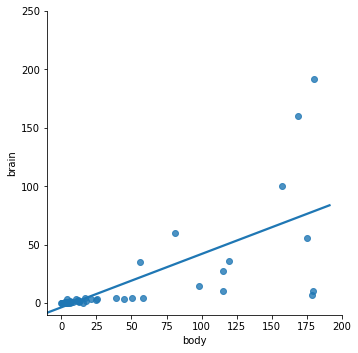

In [105]:
#there appears to be a relationship between Body and brain
#Draw the linear model

fig = sns.lmplot(x='body', y='brain', data=mammals, 
                 ci=None, fit_reg=True)
axes=fig.axes
axes[0,0].set_xlim(-10, 200);
axes[0, 0].set_ylim(-10, 250);

In [106]:
#random assignment of observations to either universe 1 or 2

np.random.seed(12345)

mammals.loc[:, 'universe'] = np.random.randint(1, 3, len(mammals))
mammals.head()

,brain,body,universe
0,3.385,44.5,1
1,0.480,15.5,2
2,1.350,8.1,2
4,36.330,119.5,2
5,27.660,115.0,1


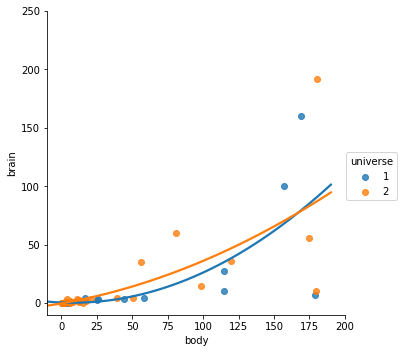

In [107]:
fig = sns.lmplot(x='body', y='brain', data=mammals,
                 ci=None, hue = 'universe', order = 2);

axes = fig.axes
axes[0,0].set_xlim(-10, 200);
axes[0,0].set_ylim(-10, 250);

In [108]:
from sklearn.datasets import load_boston

In [109]:
boston = load_boston()

In [110]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [111]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

boston = pd.concat([y,X], axis=1)
boston

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,28.7,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,22.9,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,27.1,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,16.5,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,18.9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [112]:
boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [113]:
boston.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [114]:
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [115]:
feature_cols = boston.columns.drop('MEDV')
X = boston[feature_cols]

In [116]:
y = boston.MEDV

In [117]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

In [118]:
#calc MSE from metrics

from sklearn import metrics

metrics.mean_squared_error(y, y_pred)

21.897779217687496

In [119]:
package = ['package_1', 'package_2', 'package_3', 'package_4']
directions = ['directions_1', 'directions_2', 'directions_3', 'directions_4']

In [120]:
packages_with_directions = list(zip(package, directions))
print(packages_with_directions)

[('package_1', 'directions_1'), ('package_2', 'directions_2'), ('package_3', 'directions_3'), ('package_4', 'directions_4')]


In [121]:
#unpack
box1, box2, box3, box4 = packages_with_directions

print(box1)
print(box2)

('package_1', 'directions_1')
('package_2', 'directions_2')


In [122]:
def min_max(nums):
    smallest = min(nums)
    largest = max(nums)
    
    #returns a list in the order of small to large
    return[smallest, largest]

In [123]:
min_and_max = min_max([1, 2, 3, 10, 8])

print(min_and_max)
print(type(min_and_max))


[1, 10]
<class 'list'>


In [124]:
the_min, the_max = min_and_max

print(the_min)
print(the_max)

1
10


In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [126]:
print(X.shape)

print(X_train.shape)
print(X_test.shape)

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(506, 13)
(379, 13)
(127, 13)
(506,)
(379,)
(127,)


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.head(1))

        CRIM   ZN  INDUS  CHAS    NOX    RM   AGE     DIS  RAD    TAX  \
502  0.04527  0.0  11.93   0.0  0.573  6.12  76.7  2.2875  1.0  273.0   

     PTRATIO      B  LSTAT  
502     21.0  396.9   9.08  


In [128]:
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [132]:
y = boston.loc[:, ['MEDV']]
X = boston.loc[:, ['AGE', 'RM']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [133]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
y_pred = lr.predict(X_test)

print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))


38.9690557877
42.0017522149


In [139]:
metrics.mean_squared_error(y_test, y_test.apply(np.mean, broadcast=True))



91.722797445594892

In [141]:
y_pred_null = np.ones(y_test.shape) * y_train.mean().values
metrics.mean_squared_error(y_test, y_pred_null)

93.114866997540403

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=99)

In [182]:
#manual way for teaching purposes:

mse_values = []

for train_index, test_index in kf.split(X, y):
    X_train = X.iloc[train_index, :]
    X_test = X.iloc[test_index, :]
    y_train = y.iloc[train_index, :]
    y_test = y.iloc[test_index, :]
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = metrics.mean_squared_error(y_test, y_pred)
    mse_values.append(score)

mean_mse = sum(mse_values) / len(mse_values)
print(mean_mse)
print(mse_values)

40.1584854724
[47.434881709119942, 32.162484504302867, 36.07131154121361, 52.974701601143465, 32.149048006315446]


In [183]:
kf

KFold(n_splits=5, random_state=99, shuffle=True)

In [184]:
mse_values

[47.434881709119942,
 32.162484504302867,
 36.07131154121361,
 52.974701601143465,
 32.149048006315446]

In [185]:
from sklearn.model_selection import cross_val_score

np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error'))

40.158485472419066

In [186]:
cross_val_score?


In [179]:
from sklearn.model_selection import cross_val_score

np.mean(-cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error'))

49.845841099097996